In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./immo_data.csv",).sample(30000)

Text(0.5, 0.98, 'Token counts')

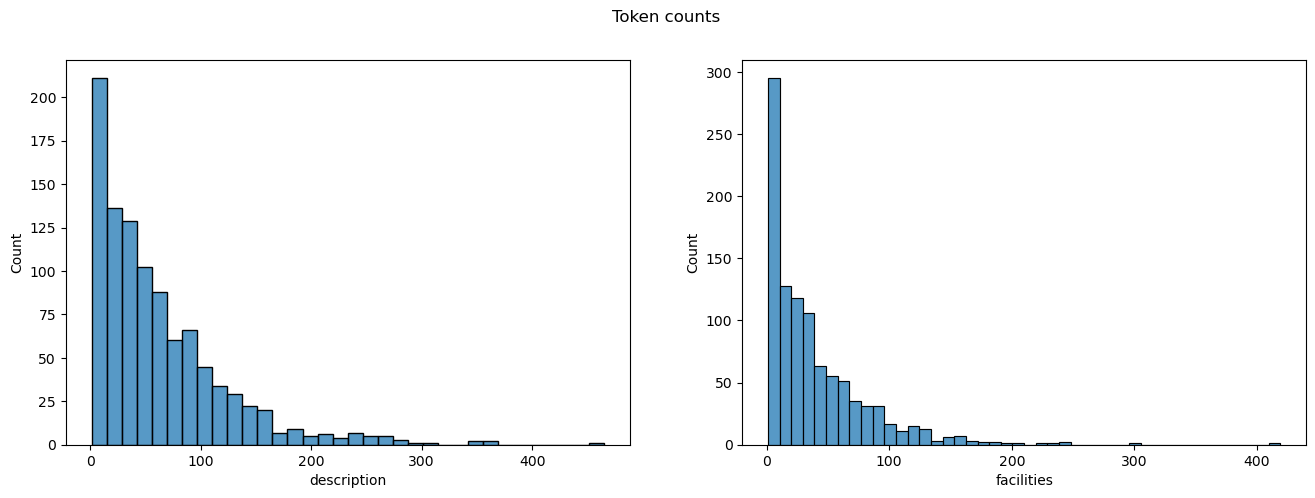

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(16,5))
sns.histplot(df['description'].apply(lambda x: len(str(x).split())).sample(1000), ax=axes[0])
sns.histplot(df['facilities'].apply(lambda x: len(str(x).split())).sample(1000), ax=axes[1])
fig.suptitle('Token counts')

In [12]:
df['facilities'].isna().sum()

6078

In [5]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    # lowercasing=True,
    separator_type='BySense',
    token_types=['Word', 'Number','SentenceBreak'],
    languages=['en','de']
)

def break_cleaner(x: str):
    x = x.replace('\r','')
    x = x.replace('\n','')
    return x

def clean_texts(texts):
    return [' '.join(simple_tokenizer.tokenize(break_cleaner(text))).replace(' . ','.') for text in texts]

tokenized_text = clean_texts(df['description'].astype(str)[:2])
tokenized_text[0]

'Geräumige Erdgeschosswohnung im gepflegten 3 Familienhaus in ruhiger Lage in einer Nebenstraße im HaseltalBad mit Fenster und Badewanne die eine Duscheinrichtung enthält Waschbecken Toilette und WaschmaschinenanschlussGäste-WC mit Fenster 1 ArbeitszimmerGroßer Balkon nach 2 Seiten des Wohnzimmers mit schönem Weitblick ins TalGarage und Carport vorhanden'

In [50]:
from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer("distiluse-base-multilingual-cased-v1")
text_model.max_seq_length = 300
text_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 300, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': True, 'activation_function': 'torch.nn.modules.activation.Tanh'})
)

In [49]:
sentences = clean_texts(df['description'].astype(str).apply(replacers).values[:15])


# Sentences are encoded by calling model.encode()
sentence_embeddings = text_model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Sentence Length:", len(sentence.split()))
    print("Embedding:", embedding.shape)
    print("")


Sentence: Das 1997 erbaute Mehrfamilienhaus befindet sich in einem ausgezeichneten Zustand. Die großzügige 3 Raum-Wohnung befindet sich im Erdgeschoss. Vom zentralen Flur kann das G-WC mit separater Dusche das Kinderzimmer Büro der großzügige Wohnraum und das Schlafzimmer betreten werden. Vom Schlafzimmer gelangt man in das Tageslicht-Wannenbad. Hier befindet sich auch der Waschmaschinenanschluss. Alternativ gibt es im Haus auch einen Waschmaschinenraum im Keller Bie Bilder sind zum Teil aus einer Nachbarwohnung mit identischem Grundriss. Die Wohnung befindet sich im Erdgeschoss mit kleiner Terrasse Der Mieter benötigt zur Anmietung des Objektes folgende Unterlagen letzten 3 Gehaltsabrechnungen Ausweiskopie ausführliche Schufa Bonitätsauskunft nicht die Schufa von Immobilienscout ausgefüllter Mieterfragebogen wird bei der Wohnungsbesichtigung übergeben Die Mindestanmietdauer der Wohnung beträgt 2 Jahre. Sollten zu den aufgeführten Punkten Fragen aufkommen bitte ich um eine Info das wir

In [22]:
embedding.shape

(512,)

In [9]:
# try out functions
from text_processing import get_sentence_embeddings, clean_texts

embeddings_df = get_sentence_embeddings(df['description'][:1000])
embeddings_df

,description_emb_d0,description_emb_d1,description_emb_d2,description_emb_d3,description_emb_d4,description_emb_d5,description_emb_d6,description_emb_d7,description_emb_d8,description_emb_d9,...,description_emb_d502,description_emb_d503,description_emb_d504,description_emb_d505,description_emb_d506,description_emb_d507,description_emb_d508,description_emb_d509,description_emb_d510,description_emb_d511
0,0.030326,-0.007021,-0.006051,0.061049,0.034559,-0.110875,-0.007019,0.034193,0.010967,0.042170,...,0.043851,0.022392,0.002196,-0.009660,0.042351,0.047260,0.030564,0.040268,-0.025237,-0.008934
1,-0.010637,-0.020518,0.028459,0.035751,0.048732,-0.079541,0.024514,-0.008492,0.056035,0.044273,...,0.047082,-0.028497,-0.008466,-0.031528,0.048309,0.011959,0.061496,0.016357,0.006141,0.010049
2,0.021041,0.098272,-0.016777,0.017340,0.124578,-0.003357,0.005400,0.033754,-0.023906,0.000296,...,-0.030439,-0.033320,0.023356,0.007413,0.020913,-0.010454,-0.025995,0.028451,0.028615,-0.015199
3,-0.024502,-0.039855,-0.012802,0.033964,0.065245,-0.044164,-0.041406,0.004875,0.008801,0.030120,...,0.022320,0.016813,-0.057757,-0.010040,0.010786,0.098554,0.009414,0.046689,0.009734,0.039903
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006385,0.021941,-0.036506,0.005015,0.091502,0.004427,0.021737,0.046820,0.088432,0.039404,...,-0.019650,-0.047159,0.016179,0.031409,-0.046391,0.009220,-0.023633,-0.014463,0.020423,0.006209
996,-0.004298,-0.014677,-0.027173,0.019247,0.090948,-0.056148,-0.023751,0.013649,0.012678,0.042402,...,0.005484,-0.057365,0.000644,0.026962,0.030186,0.070077,0.013272,0.005640,0.005799,0.046747
997,-0.012519,-0.001908,-0.018467,0.056086,0.068838,-0.056932,-0.039334,-0.001887,0.012874,0.031612,...,0.041107,-0.000877,-0.049099,0.025203,0.004883,0.061658,0.050633,-0.015826,0.025244,0.044384
998,-0.018844,-0.044037,-0.007652,0.008224,0.094885,-0.023519,-0.070114,0.000848,0.037902,0.013705,...,-0.014717,-0.014438,-0.011311,-0.017908,-0.021232,-0.011783,0.031647,0.021777,-0.044066,-0.007213
